# Finding the Best Markets to Advertise In


This project is being carried out on behalf of an an e-learning company that offers courses on programming. Most of their courses are on web and mobile development, but also cover many other domains, like data science, game development, etc. They want to promote their product and would like to invest some money in advertising. 

Our goal in this project is to find out the two best markets to advertise their product in.

## The Approach

To identify which would be the best markets to advertise in I could :

1. Organize surveys in different markets.
2. Analyse an existing dataset.

Option 2 has been chosen as it is a lot less expensive.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository. <https://github.com/freeCodeCamp/2017-new-coder-survey>

## Reading in The File and Preliminary Analysis



In [1]:
import pandas as pd

pd.options.display.max_columns=200

new_coder_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

new_coder_survey.shape

(18175, 136)

In [2]:
new_coder_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The 'JobRoleInterest' field is of particular interest. As the courses that are sold relate to Mobile / Web. We will also want to investigate the 'CountryLive' field as this indicates the market to advertise in. Finally the 'MoneyForLearning' field gives me an indication of the respondents budget.

## Determine whether Web or Mobile is in demand ?

Lets look at the 'JobRoleInterest' field.

In [3]:
new_coder_survey['JobRoleInterest'].head(10)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
5                                                  NaN
6                             Full-Stack Web Developer
7                                                  NaN
8                                                  NaN
9    Full-Stack Web Developer,   Quality Assurance ...
Name: JobRoleInterest, dtype: object

We can see from the above table that there are null values. I will replace these to make analysis of this column easier.

In [4]:
new_coder_survey['JobRoleInterest'] = new_coder_survey['JobRoleInterest'].fillna('Empty')

In [5]:
new_coder_survey['JobRoleInterest'].value_counts(normalize=True)*100

Empty                                                                                                                                                                                                                                                                       61.529574
Full-Stack Web Developer                                                                                                                                                                                                                                                     4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                    2.475928
  Data Scientist                                                                                                                                                      

Text(0, 0.5, 'Number of Responses')

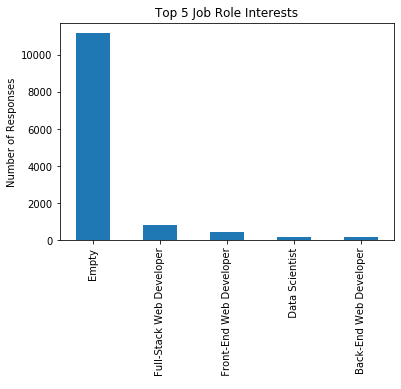

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

new_coder_survey['JobRoleInterest'].value_counts().head(5).plot.bar()
plt.title('Top 5 Job Role Interests')
plt.ylabel('Number of Responses')

From the table and chart above we can see that over 61% of respondents left the 'JobRoleInterest' field empty. Ideally I would want this field to have been completed by everyone. This does impact the conclusion that can be drawn from this survey. I will continue the analysis with the above caveat in mind.

I will proceed to investigate the relevance of the completed 'JobRoleInterest' by counting refernces to 'Web' and 'Mobile'.

In [7]:
webmobile = {'web':0,'mobile':0}

import re

for course in new_coder_survey['JobRoleInterest']:
    if re.search('[Ww]eb', course):
        webmobile['web'] += 1
      
    elif re.search('[Mm]obile', course):
        webmobile['mobile'] += 1
   

wm = pd.DataFrame.from_dict(data=webmobile, orient='index', columns=['total'])
wm



,total
web,5781
mobile,254


In [ ]:
wm['total'].plot.bar()
plt.title('Interest in Web or Mobile')
plt.ylabel('Number of Responses')

From the chart above we can see that approximately 5781 people expressed an in interest in web with 254 interested in mobile.

## Determine the Location of the Respondents?

Lets look at the 'CountryLive' field. I will exclude the 'JobRoleInterest' 'Empty' rows as we are only interested in rows that have a value.

In [ ]:
new_coder_survey_new=new_coder_survey.loc[new_coder_survey['JobRoleInterest'] != 'Empty'].copy()


new_coder_survey_new['CountryLive'].value_counts()

In [ ]:
new_coder_survey_new['CountryLive'].value_counts(normalize=True)*100

From looking at both absolute and relative frequency tables, it would suggest focusing on USA(45%, 3125) and India(7%, 528). 

## Determine the Value of Respondents

Next lets calculate the monthly spend of respondents in each country. To do this I will create a new column 'MoneySpentPerMonth' which derived is from dividing 'MoneyForLearning' by 'MonthsProgramming'.

In [ ]:
new_coder_survey_new['MonthsProgramming'].head(10)

In [ ]:
new_coder_survey_new['MonthsProgramming'].min()

We can see from above that 'MonthsProgramming' has null values and a minimum value of 0. To avoid infinity in 'MoneySpentPerMonth' I will replace the null values and 0 with 1.

In [ ]:
#Avoids infinity
new_coder_survey_new['MonthsProgramming'].replace(0,1, inplace=True)
new_coder_survey_new['MonthsProgramming']=new_coder_survey_new['MonthsProgramming'].fillna(value=1)
#new_coder_survey_new['MonthsProgramming']=new_coder_survey_new['MonthsProgramming'].apply(lambda x: x+1 if x==0 else x)
#new_coder_survey_new['MonthsProgramming']=new_coder_survey_new['MonthsProgramming'].fillna(value=1)

In [ ]:
new_coder_survey_new['MonthsProgramming'].head(10)

In [ ]:
new_coder_survey_new['MonthsProgramming'].min()

Repeat process for 'MoneyForLearning'

In [ ]:
new_coder_survey_new['MoneyForLearning'].isna().sum()

In [ ]:
new_coder_survey_new['MoneyForLearning'].min()

In [ ]:
#Avoids infinity
new_coder_survey_new['MoneyForLearning']=new_coder_survey_new['MoneyForLearning'].apply(lambda x: x+1 if x==0 else x)
new_coder_survey_new['MoneyForLearning']=new_coder_survey_new['MoneyForLearning'].fillna(value=1)

In [ ]:
new_coder_survey_new['MoneyForLearning'].isna().sum()

In [ ]:
new_coder_survey_new['MoneyForLearning'].min()

I drop na rows on 'CountryLive' as I will be grouping by it.

In [ ]:
new_coder_survey_new['CountryLive'].isna().sum()

In [ ]:
new_coder_survey_new = new_coder_survey_new.dropna(subset=['CountryLive'])
new_coder_survey_new['CountryLive'].isna().sum()

**Calculate Mean, Mode, Median for 'MoneySpentPerMonth'**

In [ ]:
#Create new column
new_coder_survey_new['MoneySpentPerMonth'] = new_coder_survey_new['MoneyForLearning'] / new_coder_survey_new['MonthsProgramming']
new_coder_survey_new['MoneySpentPerMonth'].isna().sum()

In [ ]:
#Groupby mean average
mean_avg = new_coder_survey_new.groupby(by=['CountryLive']).mean()
mean_avg['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]

In [ ]:
#Groupby mode average
avg_mode =new_coder_survey_new.groupby(['CountryLive'])['MoneySpentPerMonth'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()
avg_mode['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]

In [ ]:
#Groupby median average
median_avg = new_coder_survey_new.groupby(by=['CountryLive']).median()
median_avg['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]

The mean, mode and median figures are off as the majority of the data is incomplete. Also I  had to be replace 0 values with '1'.

## Identifying and Removing Outliers

I will now boxplot these findings to see the impact of outliers.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

uiuc = new_coder_survey_new[new_coder_survey_new['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y='MoneySpentPerMonth', x='CountryLive', data = uiuc)
plt.title('Boxplot to Identify Outliers by Country for "Money Spent Per Month"')
plt.xticks(range(4),['US','UK','India','Canada'])


plt.show()

From the looking at the chart above I will take any spend above 5000 to be an outlier.

In [ ]:
remove_outliers2 = new_coder_survey_new[new_coder_survey_new['MoneySpentPerMonth'] < 5000]
ro2_mavg = remove_outliers2.groupby(['CountryLive']).mean()
ro2_mavg['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]

Once the outliers equal to or above 5000 have been removed we can see 2nd place in Monthly Spend is Canada. But not by too much.

I would like compare the mean average monthly spend to the sample size of that country.

In [ ]:
summary_df = pd.DataFrame()

summary_df['MeanMoneySpentPerMonth']= ro2_mavg['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]
summary_df['TotalPersonsPerCountry']= remove_outliers2['CountryLive'].value_counts().iloc[0:4]
summary_df

From the table above we can see that the top two markets are USA and India. Canada has a higher mean monthly spend but from this sample its customer size is half that of india. The UK does not pass our monthly spend threshold of 59.

I would like to drill down further and include the mode monthly spend and its frequency for each country to see if this affects the result.

In [ ]:
def counting_mode(array, country):
    count_mode = 0
    for a in array:
        if a == avg_mode['MoneySpentPerMonth'][country]:
            count_mode += 1
    return count_mode

country_list=['United States of America','India','United Kingdom','Canada']

country_mode_frequency= []

for b in country_list:
    data = remove_outliers2['MoneySpentPerMonth'][remove_outliers2['CountryLive'] == b]
    country_mode_frequency.append(counting_mode(data,b))
    
country_mode_frequency
    

In [ ]:
summary_df['CountryMode'] = avg_mode['MoneySpentPerMonth'][['United States of America','India','United Kingdom','Canada']]
summary_df['CountryModeFrequency'] = country_mode_frequency

summary_df

From the table above the Mode monthly spend is 1 for all countries. The frequency of the mode is approximately 10% of the sample population for the top 3 countries. So the findings would stand.

# Conclusion and Caveats:

For the sample the top 2 markets are USA and India. There is a strong case for focusing solely in the USA as their sample size is six times that of India and has almost double the monthly average spend. If equal opportunity is part of the company mission statement or values then India and Canada should be included. UK does not hit the monthly spend requirement.

Before any actual spend on advertizing I would stronglty recommend further analysis to marketing for the following reasons:

1. The Data was not representative of our requirements. Out of 18000+ rows only approx 6000 related to web and mobile.
2. The Data was incomplete. Estimates had to be used.


